In [ ]:
# default_exp perlin

# Playing with Perlin Noise

> Perlin noise... what is it?


I spent yesterday playing with the AICrowd challenge but I don't think lnger projects should count as 'days of code' so here I am Friday pm trying to tackle something small and fun that should come in handy down the road.

For this I am NOT allowing myself to use any resources other than the [Perlin Noise Wiki page](https://en.wikipedia.org/wiki/Perlin_noise).

In [ ]:
#export 
from days_of_code.core import *
import cairocffi as cairo
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

def random_grad(ix, iy):
    #Random float. No precomputed gradients mean this works for any number of grid coordinates
    random = 2920 * np.sin(ix * 21942 + iy * 171324 + 8912) * np.cos(ix * 23157 * iy * 217832 + 9758)
    return np.array([np.cos(random),np.sin(random)])

In [ ]:
random_grad(0.3, 23)

array([0.8758147 , 0.48264751])

(30, 60, 3)


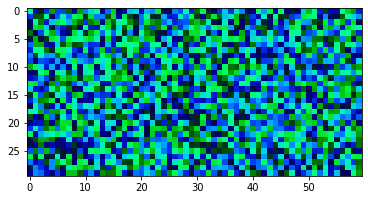

In [ ]:
# Let's visualise this random grad
nx, ny = (60, 30)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
grads = random_grad(xv, yv) # I love numpy - this works just as well as passing individual vals
grads = (grads + 1)/2 # Shift to (0, 1) for viz
im = np.stack([np.zeros((ny, nx)), grads[0], grads[1]], axis=-1)
print(im.shape)
plt.imshow(im)

In [ ]:
#export
def interpolate(a0, a1, w):
    """ Interpolate between the two points, with weight 0<w<1 """
#     return (a1 - a0) * w + a0 # Can make this smoother later
    return (a1 - a0) * ((w * (w * 6.0 - 15.0) + 10.0) * w * w * w) + a0

def dotGridGradient(ix, iy, x, y):
    gradient = random_grad(ix, iy);

    # Compute the distance vector
    dx = x - ix
    dy = y - iy

    # Return the dot-product
    return (dx*gradient[0] + dy*gradient[1]);

# Compute Perlin noise at coordinates x, y
def perlin(x,y):
    # Determine grid cell coordinates
    x0 = np.array(x).astype(int)
    x1 = x0 + 1
    y0 = np.array(y).astype(int)
    y1 = y0 + 1

    # Determine interpolation weights
    sx = x - x0 # Could also use higher order polynomial/s-curve here
    sy = y - y0

    # Interpolate between grid point gradients
    n0 = dotGridGradient(x0, y0, x, y)
    n1 = dotGridGradient(x1, y0, x, y)
    ix0 = interpolate(n0, n1, sx)

    n0 = dotGridGradient(x0, y1, x, y)
    n1 = dotGridGradient(x1, y1, x, y)
    ix1 = interpolate(n0, n1, sx)

    value = interpolate(ix0, ix1, sy)
    return value

In [ ]:
perlin(0.1, 0.3)

0.1175543716656112

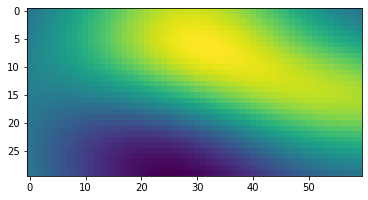

In [ ]:
plt.imshow(perlin(xv, yv))

In [ ]:
#export
def perlin_grid(w, h, x_bounds=(0, 1), y_bounds=(0, 1)):
    nx, ny = w, h
    x = np.linspace(*x_bounds, nx)
    y = np.linspace(*y_bounds, ny)
    xv, yv = np.meshgrid(x, y)
    return perlin(xv, yv)

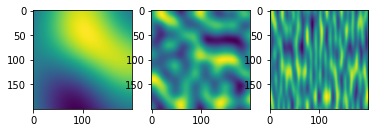

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(perlin_grid(200, 200))
ax1.imshow(perlin_grid(200, 200, x_bounds=(0, 5), y_bounds=(0, 5)))
ax2.imshow(perlin_grid(200, 200, x_bounds=(0, 20), y_bounds=(0, 4)))

# Adding to itself, fractal noise

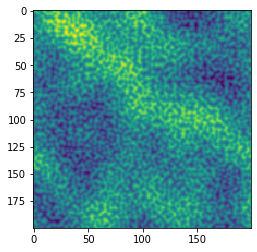

In [ ]:
n0 = perlin_grid(200, 200, x_bounds=(0, 2), y_bounds=(0, 2))
n1 = perlin_grid(200, 200, x_bounds=(0, 5), y_bounds=(0, 5))
n2 = perlin_grid(200, 200, x_bounds=(0, 50), y_bounds=(0, 50))
plt.imshow(n0+n1+n2)

In [ ]:
#skiptest

# Playing with CAIRO
import ipywidgets as widgets
import random

# Set up surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 512, 512) # Create the surface
ctx = cairo.Context(surface)

widget = widgets.Image(
    value=surface.write_to_png(),
    format='png',
    width=512,
    height=512,
)
display(widget)

def draw_turtle(t, ctx, size=512):
    x, y = t['x']*size, t['y']*size
    ctx.move_to(x, y)
    ctx.line_to(x, y+4)
    ctx.line_to(x+4, y+4)
    ctx.line_to(x+4, y)
    ctx.line_to(x, y)
    ctx.close_path()
    ctx.set_source_rgba(1, 0.5, 0.1, 1)
    ctx.fill_preserve()
    ctx.set_source_rgb(0, 0, 0)
    ctx.set_line_width(1)
    ctx.stroke()
  
turtles = [{'x':random.random(), 'y':random.random()} for _ in range(100)]


for i in range(100):
    # Draw
    for t in turtles:
        draw_turtle(t, ctx)
    widget.value = surface.write_to_png()
    
    # Move:
    for t in turtles:
        angle = perlin(t['x'], t['y']) * 3
        t['x'] += np.sin(angle)*0.01
        t['y'] += np.cos(angle)*0.01
    
    
surface.write_to_png('outputs/perlin_turtles.png') # For later display

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x06\x00\x00\x00\xf4x\xd4…

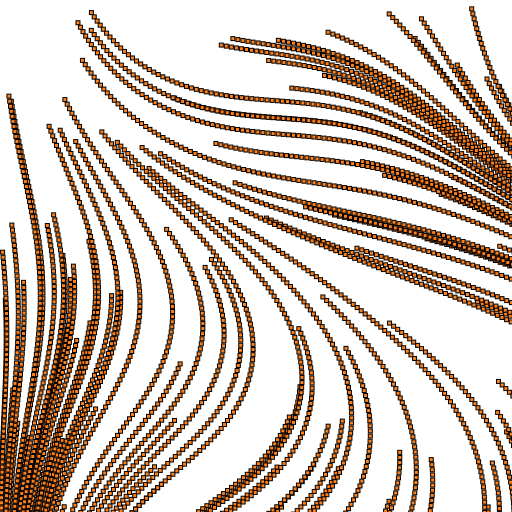

In [ ]:
from IPython.display import Image
Image('outputs/perlin_turtles.png')

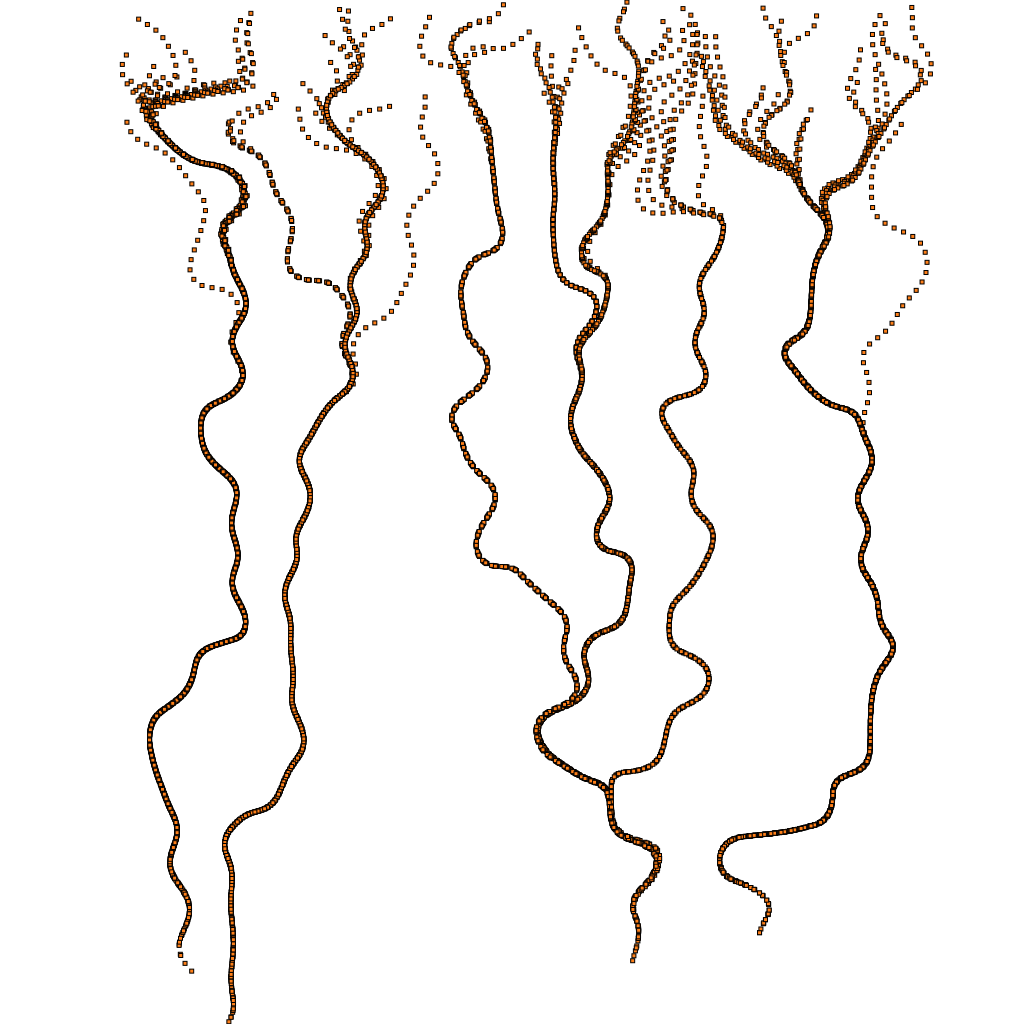

In [ ]:
#skiptest

# Set up surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 1024, 1024) # Create the surface
ctx = cairo.Context(surface)
turtles = [{'x':0.1 + random.random()*0.8, 'y':0.25 * random.random()/2} for _ in range(100)]

x_scale = random.random()*20
y_scale = random.random()*20

for i in range(100):
    # Draw
    for t in turtles:
        draw_turtle(t, ctx, size=1024)
    # Move:
    for t in turtles:
        angle = perlin(t['x']*x_scale, t['y']*y_scale) * 3
        t['x'] += np.sin(angle)*0.01
        t['y'] += np.cos(angle)*0.01
    
surface.write_to_png('outputs/perlin_turtles2.png') # For later display
Image('outputs/perlin_turtles2.png')